# Multiple_interface_string_alignments (MISA)

 
The following notebook uses a number of files provided in the following directories: ```pdb misa-RBD-ACE2-cmp  misa-RBD-IG'''

# Example 1: comparing the RBD or Sars-CoV-1 and Sars-CoV-2

This first example provides a step by step comparison on the RBD.  

## Step 1: generating all colored MISA with sbl-misa.py



First, the MISA is calculated for each of the chains specified in ```ifile-misa.txt```.

Content of ```./misa-RBD-ACE2-cmp/ifile-misa.txt``` :

```
# Windows for ACE2-bound-to-SARS-CoV-1
[ACE2-bound-to-SARS-CoV-1_0 (19, 83) (321,393)]

./pdb/2ajf.pdb (A, E, SARS-CoV-1-RBD, bound) (B, A, ACE2-bound-to-SARS-CoV-1, bound)
./pdb/2ajf.pdb (A, F, SARS-CoV-1-RBD, bound) (B, B, ACE2-bound-to-SARS-CoV-1, bound)
./pdb/5x58.pdb (A, A, SARS-CoV-1-RBD, unbound-closed) 
./pdb/6crz.pdb (A, C, SARS-CoV-1-RBD, unbound-closed)

# Specification for SARS-CoV-2
./pdb/6m0j.pdb (C, E, SARS-CoV-2-RBD, bound) (D, A, ACE2-bound-to-SARS-CoV-2, bound)
./pdb/6lzg.pdb (C, B, SARS-CoV-2-RBD, bound) (D, A, ACE2-bound-to-SARS-CoV-2, bound)
./pdb/6vxx.pdb (C, A, SARS-CoV-2-RBD, unbound-closed)
./pdb/6vyb.pdb (C, A, SARS-CoV-2-RBD, unbound-closed)  
```

Each line corresponds to a complex, or to an unbound structure if the structure is alone on its line.
For each complex, we provided one or two examples of bound complexes, as well as two examples of unbound complexes, in order to be able to calculate the $\Delta\_ASA$ induced by the conformational change. Otherwise, the $\Delta\_ASA$ won't be computed.

The first line of the file is used to restrict the displayed portion of the interface for the SARS-CoV-1 RBD, in order to compact the output.

The details of the specification are developed in the paper.

In [1]:
#!/usr/bin/python3
import os
import subprocess
import re
import shutil
from IPython.core.display import display, HTML
from collections import defaultdict
from IPython.display import IFrame
from SBL.SBL_pytools import SBL_pytools as sblpyt

In [2]:
exe        = shutil.which('sbl-misa.py')
if not exe: # if exe == None
    print('sbl-misa.py not in your PATH')
ifile              = './misa-RBD-ACE2-cmp/ifile-misa.txt'
prefix_dir         = './misa-RBD-ACE2-cmp' # To append at the beginning of every input and output directories
# It allows to compacify the possible specification of the sub-output directories.

prefix             = 'demo-misa-1' # To append at the beginning of the output files
verbose            = '0'
normalize_b_factor = '2' # Normalization with only respect to the displayed residues
cmd                = [exe, "-ifile", ifile, "-prefix_dir", prefix_dir, '-prefix', prefix, '--verbose', verbose, '-normalize_b_factor', normalize_b_factor]
print('Running %s -ifile %s -prefix_dir %s -prefix %s --verbose %s -normalize_b_factor %s' % (exe, ifile, prefix_dir, prefix, verbose, normalize_b_factor))
s                  = subprocess.check_output(cmd, encoding='UTF-8')
print('\nDone')
#print(s)


Running /user/fcazals/home/projects/proj-soft/sbl-install/lib/python3.8/site-packages/SBL/sbl-misa.py -ifile ./misa-RBD-ACE2-cmp/ifile-misa.txt -prefix_dir ./misa-RBD-ACE2-cmp -prefix demo-misa-1 --verbose 0 -normalize_b_factor 2

Done


```sbl-misa.py``` displays the MISA, with several colorings showing complementary data. 

An individual summary figure for each of the chains specified in ```ifile-misa.txt``` is produced. For example, here are the figures generated for SARS-CoV-2-RBD and for SARS-CoV-1-ACE2 (for which the effect of the window specification, restricting the range of displayed residues, can be observed) :


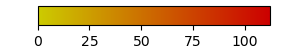
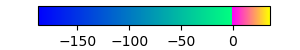
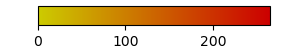
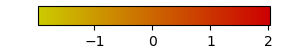

In [3]:
#IFrame(src='./misa-RBD-ACE2-cmp/MISA/SARS-CoV-2-RBD_0-demo-misa-1.html', width="100%", height=600)
display(HTML('./misa-RBD-ACE2-cmp/MISA/SARS-CoV-2-RBD_0-demo-misa-1.html'))


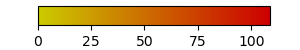
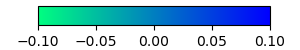
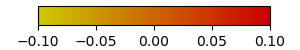
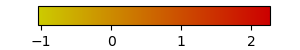

In [4]:
#IFrame(src='./misa-RBD-ACE2-cmp/MISA/ACE2-bound-to-SARS-CoV-1_0-demo-misa-1.html', width="100%", height=600)
display(HTML('misa-RBD-ACE2-cmp/MISA/ACE2-bound-to-SARS-CoV-1_0-demo-misa-1.html'))

## Step 2: mixing selected MISA   with sbl-misa-mix.py

Once these individual figures have been generated, a call to ```sbl-misa-mix.py``` allows to simultaneously compare different MISA_id in the same figure. In the sequel, we focus on the following three colored MISA: SSE, BSA, Delta_ASA,

```sbl-misa-mix.py``` parses the specification file ```ifile-misa-mix.txt```, from which it finds the location of the directory containing the input data, the MISA_id to be displayed, and the colorings to be displayed.

Content of ```./misa-RBD-ACE2-cmp/ifile-misa-mix.txt``` :

```
# List of input directories
localisation (./misa-RBD-ACE2-cmp/MISA)

# List of MISA_chain_ids
misa_chain_id (SARS-CoV-1-RBD_0, SARS-CoV-2-RBD_0)

# List of colorings of interest
coloring (SSE, BSA, Delta_ASA)
```

In [5]:
exe       = shutil.which('sbl-misa-mix.py')
if not exe: # if exe == None
    print('sbl-misa-mix.py not in your PATH')
prefix    = 'demo-mix-1' # To append at the beginning of the output files
mix_ifile = './misa-RBD-ACE2-cmp/ifile-misa-mix.txt' # Specification file
odir      = './misa-RBD-ACE2-cmp' # Output directory
verbose   = '0'
cmd       = [exe, "-mix_ifile", mix_ifile, '-prefix', prefix, '-odir', odir, '--verbose', verbose]
print('Running %s -mix_ifile %s -prefix %s -odir %s --verbose %s' % (exe, mix_ifile, prefix, odir, verbose))
s         = subprocess.check_output(cmd, encoding='UTF-8')
print('\nDone')
#print(s)

Running /user/fcazals/home/projects/proj-soft/sbl-install/lib/python3.8/site-packages/SBL/sbl-misa-mix.py -mix_ifile ./misa-RBD-ACE2-cmp/ifile-misa-mix.txt -prefix demo-mix-1 -odir ./misa-RBD-ACE2-cmp --verbose 0

Done


The first figure of the article corresponds to the output of ```sbl-misa-mix.py``` , run with the ```ifile-misa-mix.txt``` presented above :


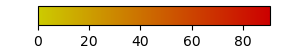
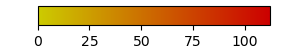
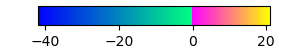
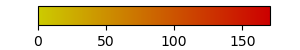
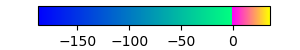
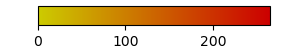

In [6]:
#IFrame(src='./misa-RBD-ACE2-cmp/demo-mix-1_SSE_BSA_Delta_ASA_SARS-CoV-1-RBD_0_SARS-CoV-2-RBD_0_mixed_figure.html', width="100%", height=600)
display(HTML('./misa-RBD-ACE2-cmp/demo-mix-1_SSE_BSA_Delta_ASA_SARS-CoV-1-RBD_0_SARS-CoV-2-RBD_0_mixed_figure.html'))

## Step 3: investigating buried surface areas of selected residues with sbl-misa-bsa.py

To further the study of an interface, we recover the BSA value of specific user defined residues. This is the purpose of ```sbl-misa-bsa.py``` .

We provide to the program an ```.xml``` file generated by ```sbl-intervor-ABW-atomic.exe``` (run with the ```--output-prefix``` option), as well as a specfile containing the list of residues of interest, as presented below :

Content of ```./misa-RBD-ACE2-cmp/ifile-misa-bsa.txt``` :

```[(A, E, 303), (A, E, 403), (A, E, 449), (A, E, 455), (A, E, 486), (A, E, 502), (B, A, 79), (B, A, 35)]  ```

In [7]:
exe      = shutil.which('sbl-misa-bsa.py')
if not exe: # if exe == None
    print('sbl-misa-bsa.py not in your PATH')
specfile = './misa-RBD-ACE2-cmp/ifile-misa-bsa.txt' # Path to the spec file containing the list of resid to be studied
xmlfile  = './misa-RBD-ACE2-cmp/input-data/intervor/sbl-intervor-ABW-atomic__radius_water_1dot4__f_6m0j__p_4__P_E__P_A___alpha_0__buried_surface_area.xml' # Name of the .xml input file 
cmd       = [exe, "-specfile", specfile, '-xmlfile', xmlfile]
s         = subprocess.check_output(cmd, encoding='UTF-8')
print(s)

Running sbl-misa-bsa.py
XML: 1 / 1 files were loaded

####################################################
BSA for the intervor_partner A

First according to the provided list of residues :

Chain E Residue 303 : bsa = NA Å^2
Chain E Residue 486 : bsa = 98.531 Å^2
Chain E Residue 502 : bsa = 41.882 Å^2
Chain E Residue 455 : bsa = 41.547 Å^2
Chain E Residue 449 : bsa = 37.186 Å^2
Chain E Residue 403 : bsa = 0.096 Å^2

Cumulated bsa for intervor_partner A - chain E is 219.242 Å^2
Cumulated bsa for intervor_partner A is 219.242 Å^2 

Then for the other residues (we only display the residues with a BSA greater than 0.001 Å^2) :

Chain E Residue 500 : bsa = 91.397 Å^2
Chain E Residue 505 : bsa = 86.628 Å^2
Chain E Residue 489 : bsa = 73.470 Å^2
Chain E Residue 493 : bsa = 60.387 Å^2
Chain E Residue 498 : bsa = 55.658 Å^2
Chain E Residue 456 : bsa = 45.129 Å^2
Chain E Residue 475 : bsa = 38.708 Å^2
Chain E Residue 487 : bsa = 38.399 Å^2
Chain E Residue 501 : bsa = 30.063 Å^2
Chain E Residue 

## Step 4: comparing  interfaces and MISA with sbl-misa-diff.py

```sbl-misa-diff.py``` allows to compare the interface between two peer chains, identifying the residues specific to each, and the shared residues, as well as displaying the BSA of these residues.

It allows to compare Voronoi interfaces and/or manually defined interfaces.
Hand-defined interfaces shall be specified in the same format as ```SARS-CoV-1-RBD-Harisson-2005.txt``` (see below), where the first line corresponds to the name given to the chain, and each subsequent line corresponds to a residue (nature + index).

Content of ```./misa-RBD-ACE2-cmp/SARS-CoV-1-RBD-Harisson-2005.txt``` :

```
harisson-interface
T402 
R426 
Y436 
Y440 
Y442 
L472 
N473 
Y475 
N479
Y484
T486 
T487 
G488 
Y491
```

The corresponding specfile is the following :

Content of ```./misa-RBD-ACE2-cmp/ifile-misa-diff.txt``` :

```
(./misa-RBD-ACE2-cmp/MISA/raw-data, 2ajf, E)
(./misa-RBD-ACE2-cmp/SARS-CoV-1-RBD-Harisson-2005.txt)
```

The output ```.txt``` file is displayed below.

In [8]:
exe      = shutil.which('sbl-misa-diff.py')
if not exe: # if exe == None
    print('sbl-misa-diff.py not in your PATH')
specfile = './misa-RBD-ACE2-cmp/ifile-misa-diff.txt'
odir     = './misa-RBD-ACE2-cmp' # Outp
cmd = [exe, "-specfile", specfile, "-odir", odir]
s = subprocess.check_output(cmd, encoding='UTF-8')
print(s)
#sblpyt.show_this_text_file('misa-RBD-ACE2-cmp/comparison-interface-2ajf-E-with-Harisson-interface-RBD-CoV1-ACE2-Science-2005.txt')
sblpyt.show_this_text_file('misa-RBD-ACE2-cmp/comparison-interface-2ajf-E-with-harisson-interface.txt')

Running sbl-misa-diff.py
Reading spec file
Reading interface file
Comparing interfaces
created ./misa-RBD-ACE2-cmp/comparison-interface-2ajf-E-with-harisson-interface.txt
Done


++Showing file misa-RBD-ACE2-cmp/comparison-interface-2ajf-E-with-harisson-interface.txt
Comparison of the Buried Surface Area (BSA) and of the nature of the residues for the interface residues.
(Missing data are denoted by "NA")

16 exclusive residues at the interface of chain 2ajf-E :
            BSA-2ajf-E Names-2ajf-E
( , 390,  )       9.34            K
( , 393,  )       4.92            D
( , 404,  )      14.90            V
( , 405,  )       1.66            I
( , 408,  )       3.25            Y
( , 432,  )       6.46            S
( , 443,  )      34.93            L
( , 460,  )       3.21            F
( , 462,  )      49.79            P
( , 463,  )      11.89            D
( , 470,  )       2.18            P
( , 480,  )       0.45            D
( , 481,  )      11.17            Y
( , 482,  )      14.59        

# Example 2: structure of the RBD or Sars-cov-1 and Sars-cov-2 bound to immunoglobulins

This figure compares the RBD interface of SARS-CoV-1 and SARS-CoV-2 with ACE2, or with different immunoglobulins (VHH72, CR3022, 2F6).

The RBD from SARS-CoV-2 is implied in several complexes, but a same structure cannot simultaneously appears more than once. It is thus necessary to make one ```ifile-misa.txt``` per complex. One subdirectory per complex, containing only the relevant ```ifile-misa.txt``` was provided.

## Step 1 : generating all colored  MISA for each complex with sbl-misa.py

Each ```ifile-misa.txt``` contains one or two examples of bound RBD, as well as two examples of unbound RBD, in order to be able to calculate the $\delta_{ASA}$ induced by the conformational change.

Content of ```./misa-RBD-IG/RBD-VHH72/ifile-misa.txt``` :
```
./pdb/6waq.pdb (A, B, SARS-CoV-1-RBD-bound-to-VHH72, bound) (B, A, VHH72, bound)
./pdb/5x58.pdb (A, A, SARS-CoV-1-RBD-bound-to-VHH72, unbound-closed) 
./pdb/6crz.pdb (A, C, SARS-CoV-1-RBD-bound-to-VHH72, unbound-closed)
```
Content of ```./misa-RBD-IG/RBD-ACE2/ifile-misa.txt``` :
```
[SARS-CoV-2-RBD-bound-to-ACE2_0 (346, 528)]
[SARS-CoV-2-RBD-bound-to-ACE2_0 (355, 494)]

# Specification SARS-CoV-1
./pdb/2ajf.pdb (A, E, SARS-CoV-1-RBD-bound-to-ACE2, bound) (B, A, ACE2-bound-to-CoV-1, bound)
./pdb/2ajf.pdb (A, F, SARS-CoV-1-RBD-bound-to-ACE2, bound) (B, B, ACE2-bound-to-CoV-1, bound)
./pdb/5x58.pdb (A, A, SARS-CoV-1-RBD-bound-to-ACE2, unbound-closed) 
./pdb/6crz.pdb (A, C, SARS-CoV-1-RBD-bound-to-ACE2, unbound-closed)

# Specification SARS-CoV-2
./pdb/6m0j.pdb (A, E, SARS-CoV-2-RBD-bound-to-ACE2, bound) (B, A, ACE2-bound-to-CoV-2, bound)
./pdb/6lzg.pdb (A, B, SARS-CoV-2-RBD-bound-to-ACE2, bound) (B, A, ACE2-bound-to-CoV-2, bound)
./pdb/6vxx.pdb (A, A, SARS-CoV-2-RBD-bound-to-ACE2, unbound-closed)
./pdb/6vyb.pdb (A, A, SARS-CoV-2-RBD-bound-to-ACE2, unbound-closed)

```
Content of ```./misa-RBD-IG/RBD-CR3022/ifile-misa.txt```
```
[SARS-CoV-2-RBD-bound-to-CR3022_0 (346, 528)]
./pdb/6yla.pdb (A, E, SARS-CoV-2-RBD-bound-to-CR3022, bound) (B, H, CR3022-antibody, bound) (B, L, CR3022-antibody, bound)
./pdb/6yla.pdb (A, A, SARS-CoV-2-RBD-bound-to-CR3022, bound) (B, B, CR3022-antibody, bound) (B, C, CR3022-antibody, bound)
./pdb/6vxx.pdb (A, A, SARS-CoV-2-RBD-bound-to-CR3022, unbound-closed)
./pdb/6vyb.pdb (A, A, SARS-CoV-2-RBD-bound-to-CR3022, unbound-closed)
```
Content of ```./misa-RBD-IG/RBD-2F6/ifile-misa.txt```
```
[SARS-CoV-2-RBD-bound-to-2F6_0 (346, 528)]
./pdb/7bwj.pdb (A, E, SARS-CoV-2-RBD-bound-to-2F6, bound) (B, H, 2F6-antibody, bound) (B, L, 2F6-antibody, bound)
./pdb/6vxx.pdb (A, A, SARS-CoV-2-RBD-bound-to-2F6, unbound-closed)
./pdb/6vyb.pdb (A, A, SARS-CoV-2-RBD-bound-to-2F6, unbound-closed)
```

In [9]:
exe = shutil.which('sbl-misa.py')
if not exe: # if exe == None
    print('sbl-misa.py not in your PATH')
for dir_complex in ['RBD-VHH72','RBD-ACE2', 'RBD-CR3022','RBD-P2B-2F6']:
    prefix_dir         = './misa-RBD-IG/%s' % dir_complex # To append at the beginning of every input and output directories
    ifile              = '%s/ifile-misa.txt' % prefix_dir # Specification file
    prefix             = 'demo-misa-2' # To append at the beginning of the output files
    verbose            = '0'
    normalize_b_factor = '2' # Normalization with only respect to the displayed residues
    cmd                = [exe, "-ifile", ifile, "-prefix_dir", prefix_dir, '-prefix', prefix, '--verbose', verbose, '-normalize_b_factor', normalize_b_factor]
    s                  = subprocess.check_output(cmd, encoding='UTF-8')
    print('Done for complex %s' % dir_complex)
    #print(s)

Done for complex RBD-VHH72
Done for complex RBD-ACE2
Done for complex RBD-CR3022
Done for complex RBD-P2B-2F6


As in the first example, a figure containing the four colorings is produced for each chain. For example, here is the RBD of SARS-CoV-2 in complex with the CR3022 antibody:


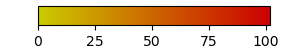
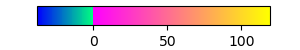
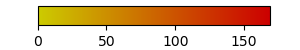
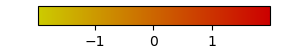

In [10]:
# IFrame(src='./misa-RBD-IG/RBD-CR3022/MISA/SARS-CoV-2-RBD-bound-to-CR3022_0-demo-misa-2.html', width="100%", height=600)
display(HTML('./misa-RBD-IG/RBD-CR3022/MISA/SARS-CoV-2-RBD-bound-to-CR3022_0-demo-misa-2.html'))

## Step 2 : mixing selected MISA

```sbl-misa-mix.py``` can also gather the output of different runs of ```sbl-misa.py``` (on the contrary to the first example where the MISA_id all came from the same run of ```sbl-misa.py```).
Here is an example, which corresponds to the second figure on the paper, based on the following ```ifile-misa-mix.txt``` :

Content of ```./misa-RBD-IG/ifile-misa-mix.txt```:

```
localisation (./misa-RBD-IG/RBD-VHH72/MISA, ./misa-RBD-IG/RBD-ACE2/MISA, ./misa-RBD-IG/RBD-CR3022/MISA, ./misa-RBD-IG/RBD-P2B-2F6/MISA)

# List of MISA_chain_ids
misa_chain_id (SARS-CoV-2-RBD-bound-to-P2B-2F6_0, SARS-CoV-2-RBD-bound-to-CR3022_0, SARS-CoV-1-RBD-bound-to-VHH72_0, SARS-CoV-2-RBD-bound-to-ACE2_0)

# List of coloring of interest
coloring (SSE)
```

In [11]:
exe       = shutil.which('sbl-misa-mix.py')
if not exe: # if exe == None
    print('sbl-misa-mix.py not in your PATH')
prefix    = 'demo-mix-2' # To append at the beginning of the output files
mix_ifile = './misa-RBD-IG/ifile-misa-mix.txt' # Specification file 
odir      = './misa-RBD-IG' # Output directory
verbose   = '0'
cmd       = [exe, "-mix_ifile", mix_ifile, '-prefix', prefix, '-odir', odir, '--verbose', verbose]
s         = subprocess.check_output(cmd, encoding='UTF-8')
print(s)

Running sbl-misa-mix.py
Done



It gives the following output :

In [12]:
#IFrame(src='./misa-RBD-IG/demo-mix-2_SSE_SARS-CoV-2-RBD-bound-to-P2B-2F6_0_SARS-CoV-2-RBD-bound-to-CR3022_0_SARS-CoV-1-RBD-bound-to-VHH72_0_SARS-CoV-2-RBD-bound-to-ACE2_0_mixed_figure.html', width="100%", height=600)
display(HTML('./misa-RBD-IG/demo-mix-2_SSE_SARS-CoV-2-RBD-bound-to-P2B-2F6_0_SARS-CoV-2-RBD-bound-to-CR3022_0_SARS-CoV-1-RBD-bound-to-VHH72_0_SARS-CoV-2-RBD-bound-to-ACE2_0_mixed_figure.html'))

## Step 3 : comparing interfaces and MISA with sbl-misa-diff.py
In the sequel, we provide three analysis:
* comparison of the interfaces (RBD bound to P2B-2F6) vs (RBD bound to ACE2)
* comparison of the interfaces (RBD bound to CR3022) vs (RBD bound to ACE2)
* comparison of our Voronoi interface against that of Ju et al, Nature, 2020


### Comparing two Voronoi interfaces

```sbl-misa-diff.py``` is used to compare the competition on the SARS-CoV-2 RBD interface between ACE2, CR3022 and P2B-2F6, looking at the residues on the RBD side involved in either interface.

We created one ```ifile-misa-diff.txt``` per interface to study.

The output ```.txt``` file is displayed right below the corresponding call to ```sbl-misa-diff.py```.

#### RBD bound to P2B-2F6 vs RBD bound to ACE2

It corresponds to the specification file ```./misa-RBD-IG/ifile-misa-diff1.txt``` :
```
(./misa-RBD-IG/RBD-P2B-2F6/MISA/raw-data, 7bwj, E)
(./misa-RBD-IG/RBD-ACE2/MISA/raw-data, 6lzg, B) 
```

In [13]:
exe = shutil.which('sbl-misa-diff.py')
if not exe: # if exe == None
    print('sbl-misa-diff.py not in your PATH')
odir     = './misa-RBD-IG' # Output directory
specfile = './misa-RBD-IG/ifile-misa-diff1.txt' # Specification file
cmd      = [exe, "-specfile", specfile, "-odir", odir]
s        = subprocess.check_output(cmd, encoding='UTF-8')
print(s)

output_file = 'misa-RBD-IG/comparison-interface-7bwj-E-with-6lzg-B.txt'
sblpyt.show_this_text_file(output_file)

Running sbl-misa-diff.py
Reading spec file
Comparing interfaces
created ./misa-RBD-IG/comparison-interface-7bwj-E-with-6lzg-B.txt
Done


++Showing file misa-RBD-IG/comparison-interface-7bwj-E-with-6lzg-B.txt
Comparison of the Buried Surface Area (BSA) and of the nature of the residues for the interface residues.
(Missing data are denoted by "NA")

10 exclusive residues at the interface of chain 7bwj-E :
            BSA-7bwj-E Names-7bwj-E
( , 346,  )      18.18            R
( , 351,  )       8.03            Y
( , 444,  )      33.62            K
( , 448,  )       4.65            N
( , 450,  )      62.33            N
( , 452,  )      37.43            L
( , 470,  )       9.64            T
( , 472,  )      11.69            I
( , 482,  )       0.06            G
( , 483,  )      68.56            V

29 exclusive residues at the interface of chain 6lzg-B :
            BSA-6lzg-B Names-6lzg-B
( , 403,  )       4.97            R
( , 405,  )      11.85            D
( , 406,  )       6.52         

#### RBD bound to CR3022 vs RBD bound to ACE2

It corresponds to the specification file ```./misa-RBD-IG/ifile-misa-diff2.txt``` :
```
(./misa-RBD-IG/RBD-CR3022/MISA/raw-data, 6yla, E)
(./misa-RBD-IG/RBD-ACE2/MISA/raw-data, 6lzg, B)  
```

In [14]:
exe = shutil.which('sbl-misa-diff.py')
if not exe: # if exe == None
    print('sbl-misa-diff.py not in your PATH')
odir = './misa-RBD-IG' # Output directory
specfile = './misa-RBD-IG/ifile-misa-diff2.txt' # Specification file
cmd = [exe, "-specfile", specfile, "-odir", odir]
s   = subprocess.check_output(cmd, encoding='UTF-8')
print(s)

output_file = 'misa-RBD-IG/comparison-interface-6yla-E-with-6lzg-B.txt'
sblpyt.show_this_text_file(output_file)

Running sbl-misa-diff.py
Reading spec file
Comparing interfaces
created ./misa-RBD-IG/comparison-interface-6yla-E-with-6lzg-B.txt
Done


++Showing file misa-RBD-IG/comparison-interface-6yla-E-with-6lzg-B.txt
Comparison of the Buried Surface Area (BSA) and of the nature of the residues for the interface residues.
(Missing data are denoted by "NA")

33 exclusive residues at the interface of chain 6yla-E :
            BSA-6yla-E Names-6yla-E
( , 368,  )       0.00            L
( , 369,  )      58.69            Y
( , 370,  )      15.39            N
( , 371,  )       6.78            S
( , 374,  )      15.88            F
( , 375,  )      26.09            S
( , 376,  )      24.00            T
( , 377,  )      56.34            F
( , 378,  )      89.76            K
( , 379,  )      37.19            C
( , 380,  )      41.05            Y
( , 381,  )      74.01            G
( , 382,  )      28.32            V
( , 383,  )      38.63            S
( , 384,  )      23.68            P
( , 385,  )      

### Comparing a Voronoi interface with a reference interface

Finally, the interface between the P2B-2F6 antibody and the RBD as described in the paper presenting it can be compared with that predicted by the Voronoi model, by providing a description of the paper interface in the following format :

Content of ```./misa-RBD-IG/SARS-CoV-2-RBD--Ju2020.txt``` :
```
Ju-interface-RBD-CoV2-IGP2B-2F6-Nature-2020
K444
G446
G447
N448
Y449
N450
L452
V483
E484
G485
F490
S494
```

and by using the following ```ifile-misa-diff3.txt``` :

Content of ```./misa-RBD-IG/ifile-misa-diff3.txt```:
```
(./misa-RBD-IG/RBD-P2B-2F6/MISA/raw-data, 7bwj, E)
(./misa-RBD-IG/SARS-CoV-2-RBD--Ju2020.txt) 
```



In [15]:
exe = shutil.which('sbl-misa-diff.py')
if not exe: # if exe == None
    print('sbl-misa-diff.py not in your PATH')
odir = './misa-RBD-IG' # Output directory
specfile = './misa-RBD-IG/ifile-misa-diff3.txt' # Specification file
cmd = [exe, "-specfile", specfile, "-odir", odir]
s   = subprocess.check_output(cmd, encoding='UTF-8')
print(s)

output_file = './misa-RBD-IG/comparison-interface-7bwj-E-with-Ju-interface-RBD-CoV2-IGP2B-2F6-Nature-2020.txt'
sblpyt.show_this_text_file(output_file)

Running sbl-misa-diff.py
Reading spec file
Reading interface file
Comparing interfaces
created ./misa-RBD-IG/comparison-interface-7bwj-E-with-Ju-interface-RBD-CoV2-IGP2B-2F6-Nature-2020.txt
Done


++Showing file ./misa-RBD-IG/comparison-interface-7bwj-E-with-Ju-interface-RBD-CoV2-IGP2B-2F6-Nature-2020.txt
Comparison of the Buried Surface Area (BSA) and of the nature of the residues for the interface residues.
(Missing data are denoted by "NA")

8 exclusive residues at the interface of chain 7bwj-E :
             BSA-7bwj-E Names-7bwj-E
( , 346,  )       18.18            R
( , 351,  )        8.03            Y
( , 445,  )       21.02            V
( , 470,  )        9.64            T
( , 472,  )       11.69            I
( , 482,  )        0.06            G
( , 492,  )        6.92            L
( , 493,  )        9.99            Q

0 exclusive residues at the interface of chain Ju-interface-RBD-CoV2-IGP2B-2F6-Nature-2020 :
Empty DataFrame
Columns: [BSA-Ju-interface-RBD-CoV2-IGP2B-2F6-Nature

## Supplementary example : comparing IG with miniproteins inhibitors

We compare the interfaces of different antibodies with the mini-proteins (LCB1 and LCB3) synthesised by Cao et al. in their article (Science, 2020).

### Generating all colored MISA for each complex with sbl-misa.py

Using the following specfiles : (the first one for LCB1 and the second one for LCB3), we compute the MISA

In [16]:
specfile_LCB1 = './misa-RBD-IG/RBD-LCB/ifile-misa-LCB1.txt'
sblpyt.show_this_text_file(specfile_LCB1)


++Showing file ./misa-RBD-IG/RBD-LCB/ifile-misa-LCB1.txt
[SARS-CoV-2-RBD-bound-to-LCB1 (346, 528)]
./pdb/7jzu.pdb (A, B, SARS-CoV-2-RBD-bound-to-LCB1, bound) (B, A, LCB1, bound)
./pdb/7jzl.pdb (A, A, SARS-CoV-2-RBD-bound-to-LCB1, bound) (B, E, LCB1, bound)
./pdb/7jzl.pdb (A, B, SARS-CoV-2-RBD-bound-to-LCB1, bound) (B, F, LCB1, bound)
./pdb/7jzl.pdb (A, C, SARS-CoV-2-RBD-bound-to-LCB1, bound) (B, G, LCB1, bound)
./pdb/6vxx.pdb (A, A, SARS-CoV-2-RBD-bound-to-LCB1, unbound-closed)
./pdb/6vyb.pdb (A, A, SARS-CoV-2-RBD-bound-to-LCB1, unbound-closed)
--Done




In [17]:
specfile_LCB3 = './misa-RBD-IG/RBD-LCB/ifile-misa-LCB3.txt'
sblpyt.show_this_text_file(specfile_LCB3)


++Showing file ./misa-RBD-IG/RBD-LCB/ifile-misa-LCB3.txt
[SARS-CoV-2-RBD-bound-to-LCB3 (346, 528)]
./pdb/7jzm.pdb (A, B, SARS-CoV-2-RBD-bound-to-LCB3, bound) (B, A, LCB3, bound)
./pdb/7jzn.pdb (A, A, SARS-CoV-2-RBD-bound-to-LCB3, bound) (B, E, LCB3, bound)
./pdb/7jzn.pdb (A, B, SARS-CoV-2-RBD-bound-to-LCB3, bound) (B, F, LCB3, bound)
./pdb/7jzn.pdb (A, C, SARS-CoV-2-RBD-bound-to-LCB3, bound) (B, G, LCB3, bound)
./pdb/6vxx.pdb (A, A, SARS-CoV-2-RBD-bound-to-LCB3, unbound-closed)
./pdb/6vyb.pdb (A, A, SARS-CoV-2-RBD-bound-to-LCB3, unbound-closed)
--Done




In [18]:
exe = shutil.which('sbl-misa.py')
if not exe: # if exe == None
    print('sbl-misa.py not in your PATH')
prefix_dir         = './misa-RBD-IG/RBD-LCB' # To append at the beginning of every input and output directories
prefix             = 'demo-misa-supp' # To append at the beginning of the output files
verbose            = '0'
normalize_b_factor = '2' # Normalization with only respect to the displayed residues
for miniprot in ["LCB1", "LCB3"]: #
    ifile              = '%s/ifile-misa-%s.txt' % (prefix_dir, miniprot) # Specification file
    cmd                = [exe, "-ifile", ifile, "-prefix_dir", prefix_dir, '-prefix', prefix, '--verbose', verbose, '-normalize_b_factor', normalize_b_factor]
    s                  = subprocess.check_output(cmd, encoding='UTF-8')
    print('Done for complex RBD-%s' % miniprot)

Done for complex RBD-LCB1
Done for complex RBD-LCB3


We display the output for LCB1 :


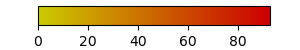
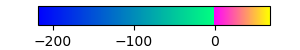
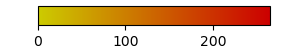
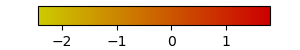

In [19]:
display(HTML('./misa-RBD-IG/RBD-LCB/MISA/SARS-CoV-2-RBD-bound-to-LCB1_0-demo-misa-supp.html'))

We display the output for LCB3 :


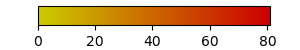
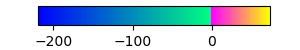
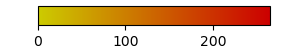
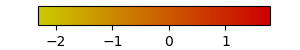

In [20]:
display(HTML('./misa-RBD-IG/RBD-LCB/MISA/SARS-CoV-2-RBD-bound-to-LCB3_0-demo-misa-supp.html'))

### Mix selected MISA with sbl-misa-mix.py

We compare their interface with those of the previously studied antibodies.

We use there ```ifile-misa-mix-supp.txt``` :

Content of ```./misa-RBD-IG/RBD-LCB/ifile-misa-mix-supp.txt```:

```
localisation (./misa-RBD-IG/RBD-VHH72/MISA, ./misa-RBD-IG/RBD-ACE2/MISA, ./misa-RBD-IG/RBD-CR3022/MISA, ./misa-RBD-IG/RBD-P2B-2F6/MISA, ./misa-RBD-IG/RBD-LCB/MISA)

# List of MISA_chain_ids
misa_chain_id (SARS-CoV-2-RBD-bound-to-P2B-2F6_0, SARS-CoV-2-RBD-bound-to-CR3022_0, SARS-CoV-1-RBD-bound-to-VHH72_0, SARS-CoV-2-RBD-bound-to-ACE2_0, SARS-CoV-2-RBD-bound-to-LCB1_0, SARS-CoV-2-RBD-bound-to-LCB3_0)

# List of coloring of interest
coloring (SSE)
```

In [21]:
exe       = shutil.which('sbl-misa-mix.py')
if not exe: # if exe == None
    print('sbl-misa-mix.py not in your PATH')
prefix    = 'demo-mix-supp' # To append at the beginning of the output files
mix_ifile = './misa-RBD-IG/RBD-LCB/ifile-misa-mix-supp.txt' # Specification file 
odir      = './misa-RBD-IG/RBD-LCB' # Output directory
verbose   = '0'
cmd       = [exe, "-mix_ifile", mix_ifile, '-prefix', prefix, '-odir', odir, '--verbose', verbose]
s         = subprocess.check_output(cmd, encoding='UTF-8')
print(s)

Running sbl-misa-mix.py
Done



This script creates the following file :

In [22]:
display(HTML('./misa-RBD-IG/RBD-LCB/demo-mix-supp_SSE_SARS-CoV-2-RBD-bound-to-P2B-2F6_0_SARS-CoV-2-RBD-bound-to-CR3022_0_SARS-CoV-1-RBD-bound-to-VHH72_0_SARS-CoV-2-RBD-bound-to-ACE2_0_SARS-CoV-2-RBD-bound-to-LCB1_0_SARS-CoV-2-RBD-bound-to-LCB3_0_mixed_figure.html'))

# Example 3 : Comparing aligned proteins

```sbl-misa.py``` allows you to compare the interface between realigned crystals, either by the user or by ```ClustalOmega``` (which must then be installed on your computer).

The alignment format provided by the user must be ```.aln```, which is the format associated with the output of ```ClustalOmega```. There must be one file per MISA id to be realigned, provided in the ```adir``` directory, and this file must contain exactly one line per chain of the MISA id. The name associated with each chain must be: [```tag```]-[```PDBID```]-[```one-letter chain_identifier```], where the tag is the same as provided in the ``ifile.txt``, so that the program can match the alignment with the chain specifications

Here is an example with the RBD of SARS-CoV-1 and SARS-CoV-2. No alignment is provided, let the program compute it itself.


The associated specification file is as follows, with the same specification rules than ```ifile-misa.txt```: 

Content of ```./misa-RBD-ACE2-cmp/ifile-misa-align.txt```:

```
# Windows for SARS-CoV-1-ACE2
[SARS-CoV-1-ACE2_0 (19, 83) (321,393)]

./pdb/2ajf.pdb (A, E, SARS-CoV-RBD-aligned, bound-CoV-1) (B, A, SARS-CoV-1-ACE2, bound)
./pdb/2ajf.pdb (A, F, SARS-CoV-RBD-aligned, bound-CoV-1) (B, B, SARS-CoV-1-ACE2, bound)
./pdb/5x58.pdb (A, A, SARS-CoV-RBD-aligned, unbound-CoV-1) 
./pdb/6crz.pdb (A, C, SARS-CoV-RBD-aligned, unbound-CoV-1)
./pdb/6vxx.pdb (A, A, SARS-CoV-RBD-aligned, unbound-CoV-2)
./pdb/6vyb.pdb (A, A, SARS-CoV-RBD-aligned, unbound-CoV-2) 
./pdb/6m0j.pdb (A, E, SARS-CoV-RBD-aligned, bound-CoV-2) (D, A, SARS-CoV-2-ACE2, bound)
./pdb/6lzg.pdb (A, B, SARS-CoV-RBD-aligned, bound-CoV-2) (D, A, SARS-CoV-2-ACE2, bound)
```

In [23]:
exe        = shutil.which('sbl-misa.py')
if not exe: # if exe == None
    print('sbl-misa.py not in your PATH')
ifile              = './misa-RBD-ACE2-cmp/ifile-misa-align.txt' # Specification file
prefix_dir         = './misa-RBD-ACE2-cmp' # To append at the beginning of every input and output directories
prefix             = 'demo-misa-1-align' # To append at the beginning of the output files
to_align           = 'SARS-CoV-RBD-aligned_0' # MISA_id to realign
adir               = '/input-data/MSA' # Where to store/read the alignment files
verbose            = '0'
normalize_b_factor = '2' # Normalization with only respect to the displayed residues
cmd                = [exe, "-ifile", ifile, "-prefix_dir", prefix_dir, '-prefix', prefix, '--verbose', verbose, '-normalize_b_factor', normalize_b_factor, '-to_align', to_align, 'adir', adir]
print('Running %s -ifile %s -prefix_dir %s -prefix %s --verbose %s -normalize_b_factor %s -to_align %s -adir %s' % (exe, ifile, prefix_dir, prefix, verbose, normalize_b_factor, to_align, adir))
s                  = subprocess.check_output(cmd, encoding='UTF-8')
#print(s)
print('\nDone')

Running /user/fcazals/home/projects/proj-soft/sbl-install/lib/python3.8/site-packages/SBL/sbl-misa.py -ifile ./misa-RBD-ACE2-cmp/ifile-misa-align.txt -prefix_dir ./misa-RBD-ACE2-cmp -prefix demo-misa-1-align --verbose 0 -normalize_b_factor 2 -to_align SARS-CoV-RBD-aligned_0 -adir /input-data/MSA

Done
